In [ ]:
# UNAD
Angel De Jesus Sepulveda Gonzales
Dataset Regresión Logística – Heart Disease Cleveland UCI

PASOS DE ACTIVIDAD
1 Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2 Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
3 Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
4 Dividir el dataset en Train y Test para evaluar correctamente el modelo
5Entrenar el modelo configurando los diferentes hiperparámetros
6 Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc
7 Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8 Interpretar, analizar y documentar los resultados obtenidos
9 Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados 

Solucion
1 Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.


In [3]:
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [15]:
Datos = pd.read_csv('C:/Dataset Regresión Logística/heart_cleveland_upload.csv')

In [17]:
Datos.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [29]:
# Descripción de los datos
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

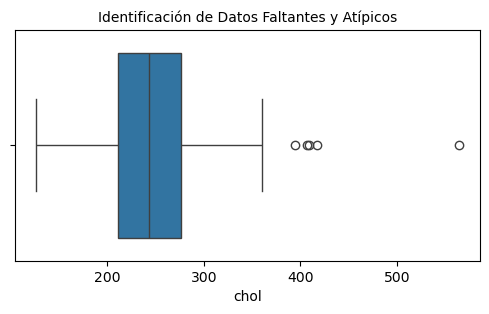

In [54]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['chol'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

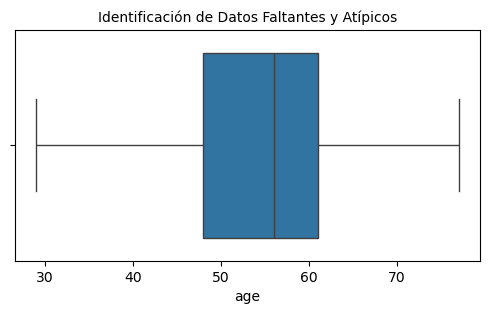

In [31]:
#Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

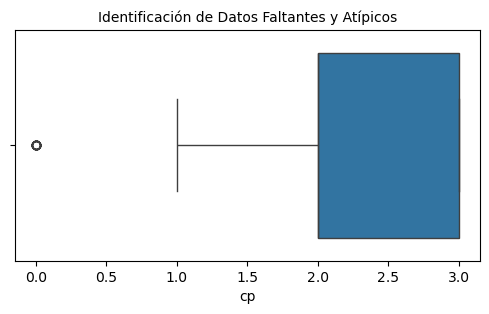

In [35]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['cp'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [ ]:
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario


In [62]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en fbs glucemia en ayunas: ",Datos['fbs'].isin([0]).sum())
print("Cantidad de Registros con cero en exang angina inducida por el ejercicio: ",Datos['exang'].isin([0]).sum())
print("Cantidad de Registros con cero en cp tipo de dolor toracico: ",Datos['cp'].isin([0]).sum())

Cantidad de Registros con cero en fbs glucemia en ayunas:  254
Cantidad de Registros con cero en exang angina inducida por el ejercicio:  200
Cantidad de Registros con cero en cp tipo de dolor toracico:  23


In [64]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

Datos['fbs']=Datos['fbs'].replace(0,Datos['fbs'].mean())
Datos['exang']=Datos['exang'].replace(0,Datos['exang'].mean())
Datos['cp']=Datos['cp'].replace(0,Datos['cp'].mean())


In [66]:
print("Cantidad de Registros con cero en fbs glucemia en ayunas: ",Datos['fbs'].isin([0]).sum())
print("Cantidad de Registros con cero en exang angina inducida por el ejercicio: ",Datos['exang'].isin([0]).sum())
print("Cantidad de Registros con cero en cp tipo de dolor toracico: ",Datos['cp'].isin([0]).sum())


Cantidad de Registros con cero en fbs glucemia en ayunas:  0
Cantidad de Registros con cero en exang angina inducida por el ejercicio:  0
Cantidad de Registros con cero en cp tipo de dolor toracico:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

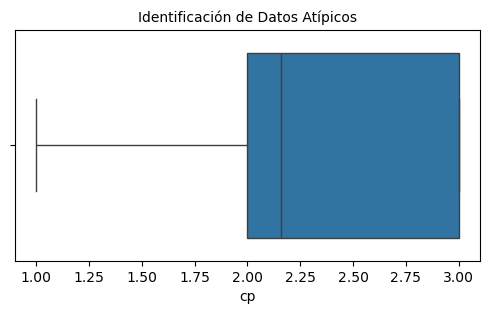

In [72]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['cp'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [74]:
#Conteo de Datos Atípicos

nivel_minimo=1.70
nivel_maximo=3.00
Total_Atipicos=((Datos['cp']<nivel_minimo)|(Datos['cp']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 49


In [78]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['cp']<nivel_maximo)&(Datos['cp']>nivel_minimo)]

In [80]:

# Validar si se removieron los datos atípicos

Total_Atipicos=((Datos['cp']<nivel_minimo)|(Datos['cp']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [82]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106 entries, 0 to 154
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        106 non-null    int64  
 1   sex        106 non-null    int64  
 2   cp         106 non-null    float64
 3   trestbps   106 non-null    int64  
 4   chol       106 non-null    int64  
 5   fbs        106 non-null    float64
 6   restecg    106 non-null    int64  
 7   thalach    106 non-null    int64  
 8   exang      106 non-null    float64
 9   oldpeak    106 non-null    float64
 10  slope      106 non-null    int64  
 11  ca         106 non-null    int64  
 12  thal       106 non-null    int64  
 13  condition  106 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 12.4 KB


In [ ]:
3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
Característica de interes:

Diabetico: si la persona tiene diabetes o no (0 = no tiene diabetes - 1 = si tiene diabetes)
Predecir si una persona puede tener diabetes

In [130]:
# Total de personas con tipo de dolor toracico

Datos['thal'].value_counts()

thal
0    72
2    30
1     4
Name: count, dtype: int64

In [ ]:
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [132]:
# Porcentaje de datos para entrenamiento (train) = 70% , y para prueba (test) = 30%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('thal',axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico 
Y = Datos['thal'] # Se cargan los datos de train con los datos de la la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [136]:
print (X_train)

     age  sex   cp  trestbps  chol       fbs  restecg  thalach     exang  \
85    65    0  2.0       160   360  0.144781        2      151  0.326599   
82    66    0  2.0       146   278  0.144781        2      152  0.326599   
137   44    0  2.0       108   141  0.144781        0      175  0.326599   
141   44    1  2.0       120   226  0.144781        0      169  0.326599   
111   54    1  2.0       150   232  0.144781        2      165  0.326599   
..   ...  ...  ...       ...   ...       ...      ...      ...       ...   
73    71    0  2.0       110   265  1.000000        2      130  0.326599   
84    65    0  2.0       155   269  0.144781        0      148  0.326599   
115   53    1  2.0       130   246  1.000000        2      173  0.326599   
95    60    0  2.0       120   178  1.000000        0       96  0.326599   
98    58    1  2.0       112   230  0.144781        2      165  0.326599   

     oldpeak  slope  ca  condition  
85       0.8      0   0          0  
82       0.0 

In [138]:
print (X_test)

     age  sex        cp  trestbps  chol       fbs  restecg  thalach     exang  \
150   39    0  2.000000       138   220  0.144781        0      152  0.326599   
1     69    0  2.158249       140   239  0.144781        0      151  0.326599   
22    34    1  2.158249       118   182  0.144781        2      174  0.326599   
106   56    1  2.000000       130   256  1.000000        2      142  1.000000   
103   57    1  2.000000       128   229  0.144781        2      150  0.326599   
78    68    1  2.000000       118   277  0.144781        0      151  0.326599   
114   53    1  2.000000       130   197  1.000000        2      152  0.326599   
124   51    0  2.000000       120   295  0.144781        2      157  0.326599   
117   52    1  2.000000       172   199  1.000000        0      162  0.326599   
129   49    1  2.000000       118   149  0.144781        2      126  0.326599   
13    58    0  2.158249       150   283  1.000000        2      162  0.326599   
87    64    1  2.000000     

In [ ]:
5. Entrenar el modelo configurando los diferentes hiperparámetros


In [140]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [142]:
X_test.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,condition
150,39,0,2.000000,138,220,0.144781,0,152,0.326599,0.0,1,0,0
1,69,0,2.158249,140,239,0.144781,0,151,0.326599,1.8,0,2,0
22,34,1,2.158249,118,182,0.144781,2,174,0.326599,0.0,0,0,0
106,56,1,2.000000,130,256,1.000000,2,142,1.000000,0.6,1,1,1
103,57,1,2.000000,128,229,0.144781,2,150,0.326599,0.4,1,1,1
78,68,1,2.000000,118,277,0.144781,0,151,0.326599,1.0,0,1,0
114,53,1,2.000000,130,197,1.000000,2,152,0.326599,1.2,2,0,0
124,51,0,2.000000,120,295,0.144781,2,157,0.326599,0.6,0,0,0
117,52,1,2.000000,172,199,1.000000,0,162,0.326599,0.5,0,0,0
129,49,1,2.000000,118,149,0.144781,2,126,0.326599,0.8,0,3,1


In [144]:

print (Prediccion)

[0 0 0 2 2 0 1 0 0 2 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 0 2]


In [ ]:
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas
como precisión, recall, F1-score, etc

In [146]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70        18
           1       0.00      0.00      0.00         1
           2       0.29      0.25      0.27         8

    accuracy                           0.56        27
   macro avg       0.32      0.32      0.32        27
weighted avg       0.54      0.56      0.55        27



In [ ]:
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

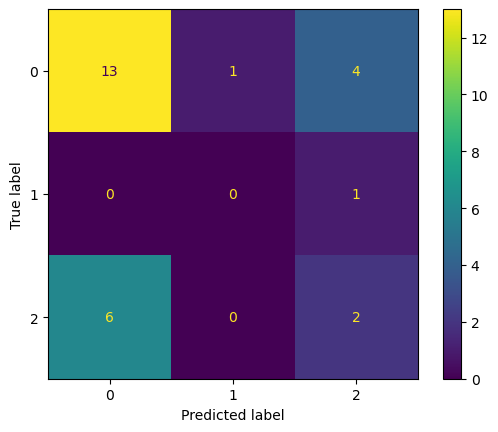

In [148]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

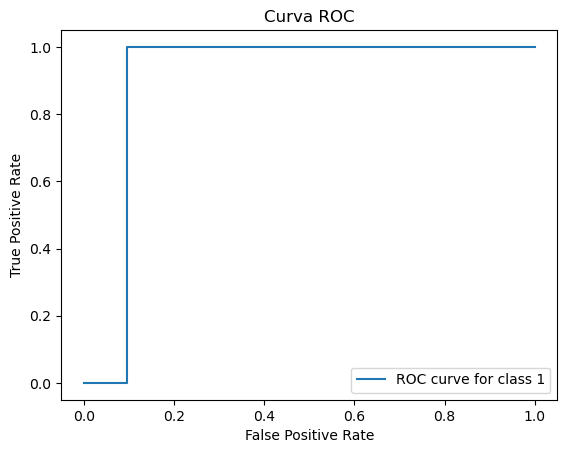

In [160]:
# Curva de precisón del modelo
from sklearn.ensemble import RandomForestClassifier  # Puedes cambiar por otro modelo si es necesario
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Dividir los datos en entrenamiento y prueba (asegúrate de que X y Y estén definidos)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Definir y entrenar el modelo
model = RandomForestClassifier()
model.fit(X_train, Y_train)  # Entrenar el modelo

# Obtener las probabilidades en lugar de etiquetas
Prediccion = model.predict_proba(X_test)

# Seleccionar una clase específica (por ejemplo, la clase "1")
y_binario = (Y_test == 1).astype(int)

# Usar la probabilidad de pertenencia a la clase 1
fpr, tpr, _ = roc_curve(y_binario, Prediccion[:, 1])

# Graficar la curva ROC
plt.plot(fpr, tpr, label="ROC curve for class 1")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.show()



In [ ]:

8. Interpretar, analizar y documentar los resultados obtenidos
- glecemia en ayunas (fbs) 254 registros que tienen valores en cero lo que intepreta que la glucemia no se encuentra elevada
- angina inducida por ejercicio (exangs) 200 registros en valor de cero lo que significa que no hubo presencia de angina inducida durante el ejercicio
    lo puede puede interpretarse como riesgos cardiovasculares 
- tipo de dolor toracico (cp) 23 registros valor cero lo que signifca quer hay pacientes tienen un tipo de dlor toracico

De la Matriz de Confusión podemos interpretar:

Verdaderos negativos (TN) = 13
Son las observaciones donde el modelo correctamente predijo falso, es decir, la condición "sin enfermedad"
fue correctamente identificada

Verdaderos positivos (TP) = 2
Son los casos en los que el modelo correctamente clasificó como Verdadero, es decir, aquellos pacientes con enfermedad
que fueron identificados correctamente.

Falsos positivos (FP) = 4
Son observaciones en las que el modelo predijo incorrectamente como "con enfermedad" cuando en realidad no lo estaban.
Esto puede llevar a falsos diagnósticos.

Falsos negativos (FN) = 6
Son casos donde el modelo clasificó incorrectamente como "sin enfermedad", cuando en realidad sí tenían la condición.
Esto es preocupante, pues podría significar que el modelo no está detectando algunos casos críticos de enfermedad.




In [ ]:
De la curva de precisión del modelo se puede interpretar:

analiza su habilidad para diferencia entre pacientes enfermos y sanos